# 利用Python的NumPy和Pandas包进行一维数据的分析。

## 数据审查

即先弄清每一张表大白内容是什么，规格有多大等：

### employment_above_15.csv

**描述**：178个国家从1991到2007这17年间的就业率百分比，即在给定年份内雇用的总人口（15岁以上）的百分比。

1. 列标签：年份，列数：17，1991-2007
2. 行标签：国家，行数：178
3. 内容：就业率，单位：%， 各列是否有缺省数据：无

注释：

1. 世界各国是指世界上各个国家，截止2019年，世界上共有233个国家和地区，其中国家有197个，地区有36个（[引用链接](https://baike.baidu.com/item/%E4%B8%96%E7%95%8C%E5%90%84%E5%9B%BD)）。

### female_completion_rate.csv

**描述**：女性小学毕业率，小学毕业率是完成小学最后一年的女学生的百分比。 计算方法是将小学最后一年级的女生总人数减去该年级的中继人数除以官方毕业年龄的子女总数。 这一比例可能会超过100％，因为过早和未成年的儿童进入小学迟到/早期和/或重复成绩。数据来源联合国教科文组织。

1. 列标签：年份，列数：42列，1970-2011
2. 行标签：国家和地区，行数：275行
3. 内容：毕业率，单位：%，各列是否有缺省数据：有

### male_completion_rate.csv

**描述**：同女性小学毕业率。

1. 列标签：年份，列数：42列，1970-2011
2. 行标签：国家和地区，行数：275行
3. 内容：毕业率，单位：%，各列是否有缺省数据：有

### gdp_per_capita.csv

**描述**：以2000年美元为基础的人均国内生产总值。本数据考虑了通货膨胀，但未考虑各国生活水平之间的差异。

1. 列标签：年份，列数：52，1960-2011
2. 行标签：国家和地区，行数：275
3. 内容：GDP per capita，单位：美元，各列是否有缺省数据：有

### life_expectancy.csv

**描述**：预期寿命，如果目前死亡率规律保持不变的话，新生儿平均生活的年数。

1. 列标签：年份，列数：205，1800-2013
2. 行标签：国家和地区，行数：244
3. 内容：预期寿命，单位：年，各列是否有缺省数据：有

## 提出问题

1. 美国或其他国家就业率如何变化？
2. 最高和最低就业率是多少？
   - 分别在哪些国家？
   - 美国在什么位置？
3. 其他变量以及这些变量之间如何相互关联？
4. 在某些时期，比如经济危机，各国之间的某些变量有什么一致的趋势？

## 练习1：标准化数据

In [3]:
import numpy as np

# First 20 countries with employment data
countries = np.array([
    'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
    'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
    'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
    'Belize', 'Benin', 'Bhutan', 'Bolivia',
    'Bosnia and Herzegovina'
])

# Employment data in 2007 for those 20 countries
employment = np.array([
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076
])

# Change this country name to change what country will be printed when you
# click "Test Run". Your function will be called to determine the standardized
# score for this country for each of the given 5 Gapminder variables in 2007.
# The possible country names are available in the Downloadables section.

country_name = 'United States'

def standardize_data(values):
    '''
    Fill in this function to return a standardized version of the given values,
    which will be in a NumPy array. Each value should be translated into the
    number of standard deviations that value is away from the mean of the data.
    (A positive number indicates a value higher than the mean, and a negative
    number indicates a value lower than the mean.)
    '''
    return (values - values.mean()) / values.std()

std_employment = standardize_data(employment)
std_employment

array([-0.31965231, -0.780123  , -0.87650077,  1.82207181, -0.03051941,
       -1.99019768,  0.30144772, -0.16973184,  0.23719615,  0.84758731,
        0.18365304,  1.00821665,  0.87971351, -0.56595055, -1.07996476,
       -0.20185762,  1.38301845, -0.03051941,  1.2545153 , -1.87240259])

## 练习2：Pandas Series 以分析相关关系。

In [14]:
import pandas as pd

countries = ['Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda',
             'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
             'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
             'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia']

life_expectancy_values = [74.7,  75. ,  83.4,  57.6,  74.6,  75.4,  72.3,  81.5,  80.2,
                          70.3,  72.1,  76.4,  68.1,  75.2,  69.8,  79.4,  70.8,  62.7,
                          67.3,  70.6]

gdp_values = [ 1681.61390973,   2155.48523109,  21495.80508273,    562.98768478,
              13495.1274663 ,   9388.68852258,   1424.19056199,  24765.54890176,
              27036.48733192,   1945.63754911,  21721.61840978,  13373.21993972,
                483.97086804,   9783.98417323,   2253.46411147,  25034.66692293,
               3680.91642923,    366.04496652,   1175.92638695,   1132.21387981]

# Life expectancy and gdp data in 2007 for 20 countries
life_expectancy = pd.Series(life_expectancy_values)
gdp = pd.Series(gdp_values)

def variable_correlation(variable1, variable2):
    '''
    Fill in this function to calculate the number of data points for which
    the directions of variable1 and variable2 relative to the mean are the
    same, and the number of data points for which they are different.
    Direction here means whether each value is above or below its mean.
    
    You can classify cases where the value is equal to the mean for one or
    both variables however you like.
    
    Each argument will be a Pandas series.
    
    For example, if the inputs were pd.Series([1, 2, 3, 4]) and
    pd.Series([4, 5, 6, 7]), then the output would be (4, 0).
    This is because 1 and 4 are both below their means, 2 and 5 are both
    below, 3 and 6 are both above, and 4 and 7 are both above.
    
    On the other hand, if the inputs were pd.Series([1, 2, 3, 4]) and
    pd.Series([7, 6, 5, 4]), then the output would be (0, 4).
    This is because 1 is below its mean but 7 is above its mean, and
    so on.
    '''
    boo = ((variable1 > variable1.mean()) + 0 ) + ((variable2 > variable2.mean()) + 0)
    num_different_direction = len(boo[boo == 1])
    num_same_direction = len(variable1) - num_different_direction
    return (num_same_direction, num_different_direction)

print(variable_correlation(life_expectancy, gdp))


(17, 3)


结果显示大部分国家是方向相同的，这可以说明这两个变量是正相关的。

若前者明显大于后者，则呈正相关关系；若后者明显大于前者，则呈负相关关系；若两者差不多，则无相关关系。

## 练习3：Series索引，找出其最大值和相应索引。

In [17]:
countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Angola',
    'Argentina', 'Armenia', 'Australia', 'Austria',
    'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
    'Barbados', 'Belarus', 'Belgium', 'Belize',
    'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
]


employment_values = [
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076,
]

# Employment data in 2007 for 20 countries
employment = pd.Series(employment_values, index=countries)

def max_employment(employment):
    '''
    Fill in this function to return the name of the country
    with the highest employment in the given employment
    data, and the employment in that country.
    
    The input will be a Pandas series where the values
    are employment and the index is country names.
    
    Try using the Pandas idxmax() function. Documention can
    be found here:
    http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html
    '''
    max_country = employment.idxmax()
    max_value = employment.max()

    return (max_country, max_value)

print(max_employment(employment))

('Angola', 75.69999695)


## 练习4：在 Pandas 中绘图

如果变量 data 是一个 `NumPy array` 或 `Pandas Series`，就像它是一个列表一样，代码

```
import matplotlib.pyplot as plt
plt.hist(data)
```

将创建数据的直方图。

`Pandas` 库实际上已经内置了 `matplotlib` 库的绘图函数。也就是说，如果对 `Pandas` 库中的 `Series` 数据绘图，不用 `import matplotlib` 就能完成绘图，你可以使用 `data.hist()` 创建直方图。另外，例子中的 `seaborn` 也是一种绘图样式库。

在此情形中，这两者没有区别，但有时候 `Pandas` 封装器更加方便。例如，你可以使用 `data.plot()` 创建 `Series` 的线条图。`Series` 索引被用于 x 轴，值被用于 y 轴。

在随后的测试题中，我们创建了一个 `Series`，其中包含本节课所涉及到的各种变量。选择你感兴趣的国家，创建每个变量随时间变化的图形。

每次你点击“测试运行”时，优达学城编辑器都将只显示一个图形。所以，你需要点击多次“测试运行”来查看多张图型。如果你在本地运行绘图代码，你可能会需要加入一行 `plt.show()` 代码。


In [18]:
import seaborn as sns

# The following code reads all the Gapminder data into Pandas DataFrames. You'll
# learn about DataFrames next lesson.

path = '/datasets/ud170/gapminder/'
employment = pd.read_csv('employment_above_15.csv', index_col='Country')
female_completion = pd.read_csv('female_completion_rate.csv', index_col='Country')
male_completion = pd.read_csv('male_completion_rate.csv', index_col='Country')
life_expectancy = pd.read_csv('life_expectancy.csv', index_col='Country')
gdp = pd.read_csv('gdp_per_capita.csv', index_col='Country')

In [19]:

# The following code creates a Pandas Series for each variable for the United States.
# You can change the string 'United States' to a country of your choice.

employment_us = employment.loc['United States']
female_completion_us = female_completion.loc['United States']
male_completion_us = male_completion.loc['United States']
life_expectancy_us = life_expectancy.loc['United States']
gdp_us = gdp.loc['United States']

In [20]:
# See the available country names
print(employment.index.values)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Rep.' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo, Rep.' 'Congo, Dem. Rep.' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Cyprus' 'Czech Rep.' 'Denmark' 'Dominican Rep.' 'Timor-Leste'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guadeloupe' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hong Kong, China' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Korea, Dem. Rep.' 'Korea, Rep.'
 'Kuwait' 'Kyrgyzstan

Populating the interactive namespace from numpy and matplotlib


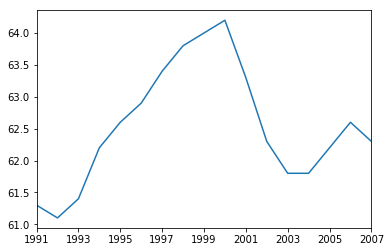

In [22]:
# Use the Series defined above to create a plot of each variable over time for
# the country of your choice. You will only be able to display one plot at a time
# with each "Test Run".
%pylab inline
employment_us.plot()